In [1]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

# Do Contínuo ao Computável: Discretização e Erros Numéricos

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Compreender a representação numérica em computadores, o sistema de ponto flutuante e os limites impostos pela finitude dos sistemas computacionais;</li>
	    <li>Reconhecer situações de <em>overflow</em>, <em>underflow</em>, perda de precisão e outros casos especiais de operações numéricas;</li>
	    <li>Analisar os diferentes tipos de erros computacionais e suas implicações na robustez e confiabilidade de algoritmos. </li>	    
        </ul>
    </div>        
    <div class="quote-box">
        <p><em> "Toda investigação cifra-se numa proporção comparativa fácil ou difícil. Eis a razão porque o infinito enquanto infinito, por subtrair-se a toda e qualquer proporção, é desconhecido." (Nicolau de Cusa, <em>De Docta Ignorantia</em>, 1440) 
        </p></em>
    </div>        
</div>

Os computadores, em sua essência, operam sobre representações discretas e finitas da informação. Diferente do mundo físico e das formulações matemáticas clássicas, as quais, na maioria das vezes, pressupõem um universo contínuo e infinitamente preciso, os sistemas computacionais lidam com números armazenados em memória finita, com quantidade limitada de dígitos binários. Esse contraste entre o mundo contínuo e o mundo discreto estabelece a base para compreender os desafios e limitações presentes na implementação de modelos matemáticos por meio de algoritmos.

Quando resolvemos numericamente problemas formulados na linguagem do Cálculo — que envolve conceitos como continuidade, derivadas e integrais —, precisamos realizar um processo chamado _discretização_. Esse processo consiste em transformar variáveis, domínios e operações contínuas em versões finitas e manipuláveis por algoritmos. Contudo, essa transformação introduz inevitavelmente erros computacionais, que podem ser classificados em diversas categorias: erros de arredondamento, decorrentes da representação finita dos números; erros de truncamento, provenientes da aproximação de processos infinitos (como séries ou integrais) por expressões finitas; e erros algorítmicos ou de método, que surgem das escolhas específicas dos procedimentos numéricos adotados.

Compreender a origem, o comportamento e os impactos desses erros é fundamental para qualquer profissional que utiliza simulações numéricas ou algoritmos computacionais. Mais do que uma questão técnica, essa compreensão permite avaliar a confiabilidade dos resultados, projetar métodos mais robustos e, quando possível, minimizar os efeitos adversos da discretização. Em última análise, o estudo dos métodos numéricos é, em grande parte, um estudo sobre como transpor, com inteligência e controle, a fronteira que separa o contínuo idealizado da matemática do discreto real dos computadores.

## Aritmética computacional

Computadores representam números inteiros de forma exata [{ref}`clipping-decimal`]. No entanto, a representação de números reais é sempre aproximada e limitada a um conjunto finito de valores. Essa limitação decorre da necessidade de codificar números contínuos em uma estrutura binária finita. A aritmética computacional, portanto, lida tanto com números inteiros quanto com os chamados números em ponto flutuante, que permitem representar aproximações de números reais.

O estudo da aritmética computacional concentra-se em dois aspectos fundamentais:

1. a representação dos números no formato de máquina, isto é, em base binária, com precisão e alcance finitos; e

2. o desenvolvimento de algoritmos capazes de realizar operações aritméticas fundamentais, como adição, subtração, multiplicação e divisão, de forma eficiente e consistente dentro dos limites impostos pelo hardware.

Métodos numéricos são, essencialmente, algoritmos que utilizam essas quatro operações como blocos fundamentais, aplicando-as de forma estruturada e sofisticada para resolver problemas matemáticos de interesse científico e de engenharia. Atualmente, o padrão IEEE 754 [{ref}`clipping-ieee754`] é adotado globalmente pelos fabricantes de processadores. Esse padrão define as regras para a representação, as operações e os comportamentos dos números em ponto flutuante, assegurando portabilidade e previsibilidade dos cálculos entre diferentes arquiteturas, seja em 16, 32, 64 ou 128 bits. Sua primeira versão foi publicada em 1985, com a atualização mais recente ocorrendo em 2019 {cite:p}`fasi2021algorithms`.

### Unidade Lógica e Aritmética

A _Unidade Lógica e Aritmética_ (ULA) é a parte do hardware computacional conectada à unidade central de processamento (CPU) que realiza as operações aritméticas e lógicas sobre os dados processados ({numref}`fig-ula`). A ULA é um componente eletrônico que funciona segundo a lógica dos cicuitos digitais, ou seja, interpretando operações em lógica Booleana (`and`, `or`, `not`).

Há muito mais por trás das operações fundamentais executadas pelos computadores. Em Python, por exemplo, há casos de aproximações que chegam a ser curiosos. Isto ocorre devido ao erro inerente da representação numérica, principalmente quando os números são fracionários.

```{figure} ../figs/ula-ai.png
---
width: 250px
name: fig-ula
---
Ilustração de um chip de computador destacando as interconexões responsáveis por operações lógicas, aritméticas e troca de informação com a unidade de controle.
```

### Casos curiosos

A aritmética de ponto flutuante possui situações inusitadas e respostas estranhas que podem levar-nos a duvidar se estamos realizando operações corretamente. Abaixo, mostramos alguns casos curiosos (coloquialmentem) que ocorrem devido à representação finita de números pelo computador. Outras indagações sobre ponto flutuante são respondidas em [{ref}`extra-float`].


- A fração $1/3 = 0.3333\ldots$ é uma dízima. O seu triplo é?

In [2]:
1/3

0.3333333333333333

In [3]:
1/3 + 1/3 + 1/3

1.0

- A soma $0.3 + 0.3 + 0.3$ difere de $0.9$.

In [4]:
0.3 + 0.3 + 0.3

0.8999999999999999

- $1/10 + 1/10 + 1/10 \neq 3/10$

In [5]:
1/10 + 1/10 + 1/10 == 3/10

False

- Multiplicação por fracionários

In [6]:
# note a variabilidade de dígitos após o ponto
for x in [0.3, 0.33, 0.333, 0.3333, 0.33333, 0.333333, 0.3333333, 0.333333333]:
    print(f'3*{x}'.ljust(13,' '),'=', 3*x, sep=' ')

3*0.3         = 0.8999999999999999
3*0.33        = 0.99
3*0.333       = 0.9990000000000001
3*0.3333      = 0.9999
3*0.33333     = 0.99999
3*0.333333    = 0.999999
3*0.3333333   = 0.9999998999999999
3*0.333333333 = 0.999999999


#### A finitude explicada

Os casos acima possuem uma razão comum: a capacidade finita dos computadores para representar números fracionários. Vamos analisar de modo breve o caso da fração 1/10 sem nos aprofundar em detalhes.

Em um computador de arquitetura 64 bits que segue o padrão IEEE 754, a melhor aproximação para 1/10 é um número com 55 dígitos decimais.

In [7]:
# imprime número com 55 dígitos
print(format(0.1,'.55f'))

0.1000000000000000055511151231257827021181583404541015625


Notemos que tentar aumentar os dígitos não produzirá significância:

In [8]:
# imprime número com 60 dígitos
print(format(0.1,'.60f'))

0.100000000000000005551115123125782702118158340454101562500000


In [9]:
# imprime número com 80 dígitos
print(format(0.1,'.80f'))

0.10000000000000000555111512312578270211815834045410156250000000000000000000000000


Portanto, quando somamos 1/10 + 1/10 + 1/10 vemos um número diferente de 3/10.

In [10]:
# imprime número com 55 dígitos
print(format(0.1 + 0.1 + 0.1,'.55f'))

0.3000000000000000444089209850062616169452667236328125000


### Notação científica

Números em ponto flutuante são a versão computacional da notação científica. Escrevemos um número decimal em notação científica da seguinte forma:

$$x = f \times 10^e,$$

com a fração (ou mantissa) $f$ determinando a precisão e o expoente $e$ a ordem de grandeza. Pontos flutuantes admitem $f$ na forma _normalizada_, isto é, menor do que 1. A tabela abaixo mostra alguns exemplos de como usamos essas notações.


| Número decimal | Notação científica | Repr. ponto flutuante
|:---------------|--------------------|------:|
|$2.65$ | $2.65 \times 10^0$ | $0.265 \times 10^1$|
|$0.0000012$ | $1.2 \times 10^{-6}$ | $0.12 \times 10^{-5}$|
|$4532$ | $4.532 \times 10^{3}$ | $0.4532 \times 10^{4}$|

Em termos de código Python – e em outras linguagen smte, a notação científica em base 10 pode ser realizada da seguinte forma:

In [11]:
2.65e0, 1.2e-6, 4532e3

(2.65, 1.2e-06, 4532000.0)

## Ponto flutuante: a reta "perfurada" 

Desde os primórdios dos computadores mecânicos e eletrônicos, a precisão e a confiabilidade dos cálculos têm estado no centro das atenções e ambas são afetadas pelas discrepâncias entre números reais, infinitos e contínuos, e suas representações em máquina, finitas e discretas. Nas décadas de 1940 e 1950, houve uma clara percepção de que o sistema de ponto fixo, até então utilizado, era bastante limitado para dar precisão aos cálculos e que o aparato de _hardware_ disponível na época era incapaz de lidar com situações de "sobrecarga" (_overflow_) ou "subfluxo" (_underflow_). Em outras palavras, representar números muito pequenos ou muito grandes, como $10^{-30}$ ou $543.671^3$, era algo impensável.

Com a introdução da aritmética de ponto flutuante nos anos 1950 e 1960, os computadores passaram a representar uma quantidade significativa de números. Porém, o preço que se pagou por esse progresso foi a aparição de novos tipos de erros, como os erros de arredondamento, que ocorrem quando os números são aproximados para caber no formato de ponto flutuante. Mesmo com a implantação do padrão IEEE-754 em 1985, o qual uniformizou a representação e a manipulação de números em ponto flutuante, os erros inerentes não foram eliminados. A pesquisa em computação científica e de alto desempenho, reveladora de que os erros são obstinados, está bastante ativa e expandindo o conhecimento. Recentemente, um grupo de espanhois trouxe perspectivas promissoras para o formato _posit64_ {cite:p}`mallasen2024big`, uma alternativa potencialmente superior ao padrão IEEE-754. Através de diversos testes, eles concluíram que o sistema baseado na arquitetura RISC-V (quinta geração da _Reduced Instruction Set Computer_), oferece maior precisão, resiliência a erros de arredondamento e eficiência de armazenamento.

Em vez de operar sobre o conjunto dos números reais (conjunto $\mathbb{R}$), a matemática computacional está definida no domínio $\mathbb{F}$, o conjunto dos números em ponto flutuante representáveis pela máquina. Vejamos um exemplo.

Um sistema de ponto flutuante simplório em base binária, com apenas 3 dígitos de precisão e limites de _underflow_ e _overflow_ com expoentes variando de -1 a 2 possui 32 números representáveis, além do zero. Os 16 números positivos, derivados das mantissas $0.100$, $0.101$, $0.110$ e $0.111$, são os seguintes:

- $(0.100 \times 2^{-1})_{2} = (0.01)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} = 1/4$
- $(0.100 \times 2^{0})_{2} = (0.1)_2 = 0.2^0 + 1.2^{-1} = 1/2$
- $(0.100 \times 2^{1})_{2} = (1.0)_2 = 1.2^0 + 0.2^{-1} = 1$
- $(0.100 \times 2^{2})_{2} = (10.0)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$

- $(0.101 \times 2^{-1})_{2} = (0.0101)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} + 0.2^{-3} + 1.2^{-4}= 5/16$
- $(0.101 \times 2^{0})_{2} = (0.101)_2 = 0.2^0 + 1.2^{-1} + 0.2^{-2} + 1.2^{-3} = 5/8$
- $(0.101 \times 2^{1})_{2} = (1.01)_2 = 1.2^0 + 0.2^{-1} + 1.2^{-2} = 1$
- $(0.101 \times 2^{2})_{2} = (10.1)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$

(...)

Prosseguindo para os números restantes, obtemos a seguinte tabela: 

|     | m  | 0.100 | 0.101 | 0.110 | 0.111 |
|-----|----|------ |-------|-------|-------|
|**e**|    |       |       |       |       |
| -1  |    | 1/4   | 5/16  | 3/8   | 7/16  |
| 0   |    | 1/2   | 5/8   | 3/4   | 7/8   |
| 1   |    | 1     | 5/4   | 3/2   | 7/4   |
| 2   |    | 2     | 5/2   | 3     | 7/2   |

Na reta real, esses valores ficariam dispostos da seguinte forma: 

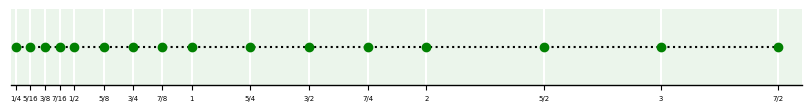

In [12]:
from matplotlib.pyplot import subplots
import matplotlib.ticker as mticker
from fractions import Fraction

x = [1/4,1/2,1,2,5/16,5/8,5/4,5/2,3/8,3/4,3/2,3,7/16,7/8,7/4,7/2]
x = sorted(x)

fig, ax = subplots(figsize=(8,1),constrained_layout=True)
ax.plot(x,16*[0],':k')
ax.plot(x,16*[0],'og');
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.xaxis.set_major_locator(mticker.FixedLocator(x))
ax.set_xticklabels([str(Fraction(xi)) for xi in x],fontsize=5)
ax.set_xlim([0.23,3.6]);

Isto é, $\mathbb{F}$ é uma reta "perfurada", para a qual apenas 16 números positivos, 16 simétricos destes (que seriam refletidos na origem para o extremo negativo) e mais o 0 são representáveis. Logo, esse sistema seria capaz de representar apenas 33 números.

### Simulador de $\mathbb{F}$


Clássicamente, um sistema de ponto flutuante é descrito por $\mathbb{F}(b, t, L, U)$, onde $b$ é a base (geralmente binária nos sistemas modernos), $t$ são os dígitos significativos da mantissa, que determina a precisão, $L$ é o menor expoente inteiro possível (que controal o limite de _underflow_) e $U$ é o maior expoente inteiro possível (que controla o limite de _overflow_). No exemplo acima, o sistema é $\mathbb{F}(2, 3, -1, 2)$. 

O código abaixa gera uma reta perfurada para um sistema computacional de interesse.

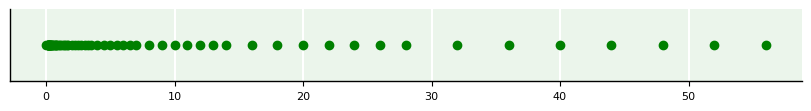

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def simulacao_F(b,t,L,U):
    x = []
    epsm = b**(1-t) # epsilon de máquina
    M = np.arange(1.,b-epsm,epsm)

    E = 1
    for e in range(0,U+1):
        x = np.concatenate([x,M*E])
        E *= b    
    E = b**(-1)
    
    y = []
    for e in range(-1,L-1,-1):
        y = np.concatenate([y,M*E])
        E /= b    
    yy = np.asarray(y)
    xx = np.asarray(x)    
    x = np.concatenate([yy,np.array([0.]),xx])
    return x

Y = simulacao_F(2,4,-3,5)
X = np.zeros(Y.shape)


# plotagem
fig, ax = subplots(figsize=(8,1),constrained_layout=True)
ax.scatter(Y,X,marker='o',color='g');
ax.get_yaxis().set_visible(False)


### Limites de máquina para ponto flutuante

Nos sistemas mais modernos, os parâmetros de $\mathbb{F}$ crescem vertiginosamente com o aumento dos _bits_ ({numref}`Tabela %s <tbl-F>`). A quantidade de números representáveis no Float64 é aproximadamente 1.84e19 apenas considerando os números normais.

```{table} Parâmetros de $\mathbb{F}$ para as arquiteturas modernas.
:name: tbl-F
| Formato       | Base ($b$)   | Dígitos significativos ($t$)  | Expoente inferior ($L$)   | Expoente superior ($U$) |
|:--------------|--------------|-------------------------------|---------------------------|------------------------:|
| float16       | 2            | 11                            | -14                        | +15                    |
| float32       | 2            | 24                            | -126                       | +127                   |
| float64       | 2            | 53                            | -1022                      | +1023                  |
| float128 (*)  | 2            | 113                           | -16382                     | +16383                 |
```

(*) Nem todos os processadores oferecem suporte nativo para `float128`. É frequentemente implementado em software.

Em Python, podemos utilizar diferentes sistemas de ponto flutuante. Cada um possui suas particularidades. Os mais comuns são:

- `float16` (meia precisão): ideal para aplicações onde a velocidade e o uso de memória são críticos, como em inferências de aprendizado profundo em dispositivos com recursos limitados.
- `float32` (precisão simples): comumente usado em jogos, gráficos, e muitas aplicações de aprendizado de máquina devido ao bom equilíbrio entre precisão e eficiência.
- `float64` (precisão dupla; _alias_ para `float`): essencial para simulações científicas, finanças e outras áreas onde a precisão é crucial e a memória não é preocupação.

O `numpy` suporta todos os três na maioria dos computadores de hoje ({numref}`Tabela %s <tbl-float>`). 

```{table} Comparativo entre sistemas de ponto flutuante
:name: tbl-float

| Atributo              | `float16`                  | `float32`                  | `float64`                  |
|:-----------------------|:----------------------------|:----------------------------|:----------------------------|
| **Tamanho**           | 16 bits (2 bytes)          | 32 bits (4 bytes)          | 64 bits (8 bytes)          |
| **Precisão**          | Baixa                      | Moderada                   | Alta                       |
| **Intervalo de Valores** | $\approx 5.96 \times 10^{-8}$ a $6.55 \times 10^{4} $ | $\approx 1.18 \times 10^{-38} $ a $3.4 \times 10^{38} $ | $\approx 2.23 \times 10^{-308} $ a $1.8 \times 10^{308} $ |
| **Bits de Sinal**     | 1                          | 1                          | 1                          |
| **Bits de Expoente**  | 5                          | 8                          | 11                         |
| **Bits de Mantissa**  | 10                         | 23                         | 52                         |
| **Uso de Memória**    | Muito baixo                | Moderado                   | Alto                       |
| **Aplicações**        | Aprendizado profundo em dispositivos de recursos limitados | Gráficos de computador, simulações científicas, aprendizado de máquina | Cálculos científicos, engenharia, finanças de alta precisão |
| **Exemplo de Valores** | $3.140625$ para representar aproximadamente $\pi$ | $3.1415927$ para representar aproximadamente $\pi$ | $3.141592653589793$ para representar aproximadamente $\pi$ |
| **Vantagens**         | Usa menos memória e é mais rápido em termos de computação. Ideal para aplicações onde a memória é restrita e a precisão pode ser sacrificada. | Oferece um bom equilíbrio entre precisão e uso de memória. Amplamente utilizado em gráficos e aprendizado de máquina. | Alta precisão e amplo intervalo dinâmico. Ideal para cálculos científicos e de engenharia onde a precisão é crucial. |
| **Desvantagens**      | Precisão muito limitada, o que pode levar a erros significativos em cálculos complexos. | Pode não ser suficientemente preciso para cálculos científicos muito precisos. | Usa mais memória e pode ser mais lento em termos de computação comparado com float16 e float32. |
```

A seguinte função imprime os valores dos principais atributos de `numpy.finfo` que nos ajudam a entender melhor os limites de máquina em Python para esses sistemas de ponto flutuante.

In [14]:
import numpy as np 

def print_attribute(dtype: str, attrib: str) -> None:
    """
    Imprime informações de atributo para os sistemas de ponto flutuante \
        de 16, 32 e 64 bits operados pelo numpy
        
    Atributos relevantes: 
    
        - eps: menor valor x, tal que 1.0 + x > 1.0 (epsilon de máquina)
        - max: maior número finito que pode ser representado pelo tipo de dado de ponto flutuante.
        - min: menor número finito negativo que pode ser representado pelo tipo de dado de ponto flutuante.
        - tiny: menor número positivo normalizado que pode ser representado.
        - nexp: número de bits no expoente       
        - nmant: número de bits na mantissa
    """
    
    # checagem de sistema permitido
    assert dtype in ['float16', 'float32', 'float64'], 'Sistema não permitido!'
    
    # impressão    
    print(f'{attrib}:')
    exec(f'print(np.finfo(np.{dtype}).{attrib})')

A partir daí, podemos verificar os valores para cada sistema individualmente:

In [15]:
print('--- float16 \n')
for attrib in ['eps', 'max', 'min', 'tiny', 'nexp', 'nmant']:
    print_attribute('float16', attrib)
    
print('\n--- float32 \n')
for attrib in ['eps', 'max', 'min', 'tiny', 'nexp', 'nmant']:
    print_attribute('float32', attrib)
    
print('\n--- float64 (float) \n')
for attrib in ['eps', 'max', 'min', 'tiny', 'nexp', 'nmant']:
    print_attribute('float64', attrib)

--- float16 

eps:
0.000977
max:
65500.0
min:
-65500.0
tiny:
6.104e-05
nexp:
5
nmant:
10

--- float32 

eps:
1.1920929e-07
max:
3.4028235e+38
min:
-3.4028235e+38
tiny:
1.1754944e-38
nexp:
8
nmant:
23

--- float64 (float) 

eps:
2.220446049250313e-16
max:
1.7976931348623157e+308
min:
-1.7976931348623157e+308
tiny:
2.2250738585072014e-308
nexp:
11
nmant:
52


#### O épsilon de máquina

A unidade de arredondamento, comumente chamada de "épsilon de máquina" e aqui denotada por $\epsilon_M$, é definida como o menor número positivo que, somado à unidade, produz um resultado diferente de 1 na máquina. Em termos matemáticos:

$$1.0 + \epsilon_M > 1.0$$

De outra forma, essa definição pode ser interpretada como: $\epsilon_M$ é a menor diferença entre 1 e o próximo número maior que pode ser representado no sistema numérico da máquina. 

Para ilustrar este conceito, consideremos um sistema hipotético de 8 bits, no qual cada número é codificado como uma sequência de 8 dígitos binários, segundo a seguinte estrutura:

- 1 bit para o sinal;

- 3 bits para o expoente (com bias);

- 4 bits para a mantissa (ou parte fracionária).

Neste sistema, o número 1 em base decimal é representado pelo binário 00110000. O próximo número representável é 00110001, que corresponde ao valor decimal 1.0625. Assim, o épsilon de máquina para este sistema é:

$$\epsilon_M = 1.0625 - 1 = 0.0625$$

Para este cálculo, utilizamos a fórmula geral de ponto flutuante: $x = (-1)^s 2^{(c - \text{bias})} \cdot (1 + f)$.

- O bias, para 3 bits de expoente, é calculado como: $\text{bias} = \frac{2^3 - 1}{2} = 3$

- No caso do número 1, os bits do expoente são 011, que correspondem ao valor: $c = (0) 2^2 + (1) 2^1 + (1) 2^0 = 3$

- Como o sinal é positivo $(s = 0)$ e a mantissa está zerada $(f = 0)$, o cálculo resulta em: $x = (1) 2^{(3-3)} (1 + 0) = 1$

A representação binária 00110000 corresponde, portanto, ao número decimal 1.

No próximo número representável, a menor alteração ocorre no _bit_ menos significativo da mantissa, que vale $2^{-4} = 0.0625$. Isso significa que a sequência binária 00110001 representa: 1 + 0.0625 = 1.0625. Portanto, $\epsilon_M = 0.0625$. Se adicionarmos outro _bit_ da mantissa (o segundo bit menos significativo), obteremos uma contribuição de $2^{-3} = 0.125$, que somada à anterior resulta em: 0.0625 + 0.125 = 0.1875. Assim, o número subsequente seria 1.1875, e a diferença entre 1.1875 e 1.0625 é 0.125, maior que $\epsilon_M$.

Esse exemplo evidencia um ponto fundamental: a unidade de arredondamento ($\epsilon_M$) não corresponde a uma "distância constante" na reta dos números reais. A densidade dos números representáveis na máquina não é uniforme — ela depende diretamente do valor do expoente. Assim, embora $\epsilon_M$ defina a menor diferença ao redor de 1, para números muito maiores ou muito menores, essa distância aumenta ou diminui exponencialmente, como a figura da reta perfurada anterior mostra.

#### Sensibilidade numérica

A sensibilidade numérica mede o quanto a saída de um problema ou algoritmo é afetada por pequenas variações na entrada. Se pequenas perturbações nos dados de entrada causam grandes variações na saída, dizemos que o problema (ou o algoritmo) é sensível, ou seja, mal condicionado. Se, ao contrário, a saída varia pouco frente a pequenas perturbações, dizemos que o problema é bem condicionado, portanto, pouco sensível.

Quando subtraímos 1 de valores de $\epsilon$ cada vez menores, a subtração no denominador da fração

$$f(\epsilon) = \dfrac{ (1 + \epsilon) - 1}{\epsilon}$$

começa a se aproximar de zero por cancelamento subtrativo e o valor de $f$ torna-se cada vez mais instável até cair a "zero". O efeito de $\epsilon_M$ em cálculos pode ser mostrado na figura abaixo. 

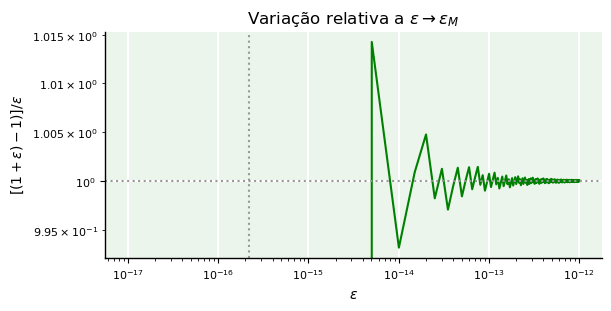

In [16]:
from matplotlib.pyplot import subplots
from numpy import linspace,finfo

fig, ax = subplots(figsize=(6,3), constrained_layout=True)

e = linspace(1e-17, 1e-12, num=200)
f = ((1 + e) - 1)/e

ax.loglog(e, f, 'g')
ax.axhline(y=1, ls=':', c=[0.6,0.6,0.6])
ax.axvline(x=finfo(float).eps, ls=':', c=[0.6,0.6,0.6])

ax.set_xlabel(r'$\epsilon$', fontsize=10)
ax.set_ylabel(r'$[(1+\epsilon)-1)] / \epsilon$', fontsize=10)
ax.set_title(r'Variação relativa a $\epsilon \to \epsilon_M $');

### Valores e operações especiais

O padrão IEEE 754 traz alguns valores especiais para representar cadeias de bits especiais. São eles:

- _NaN_ (_not a number_): representa um valor que é um erro.
- _Inf_ (_infinity_): representa o infinito (em ambos os sentidos, positivo e negativo).

A partir desses valores especiais, operáveis pelo módulo _numpy_ com `numpy.nan` e `numpy.inf`, respectivamente, podemos imitar operações matemáticas "equivalentes". Primeiramente, façamos:

In [17]:
from numpy import nan, inf

Em seguida, analisemos qual é o comportamento de algumas operações especiais: 

- $n \div \pm \infty \to \pm 0, \ \ n \in \mathbb{F}$

In [18]:
2.1/inf, -4/inf, 5.2/-inf, 6/-inf

(0.0, -0.0, -0.0, -0.0)

- $\pm \infty \times \pm \infty \to \pm \infty$

In [19]:
inf*inf, inf*(-inf), -inf*inf, (-inf)*(-inf)

(inf, -inf, -inf, inf)

- $n \div \pm 0 \to \ \ !, \ \ n \in \mathbb{F}^{*}$ (neste caso, teremos um erro de divisão por zero)

In [20]:
1/0, -2/0, 3/(-0), 4/(-0)

ZeroDivisionError: division by zero

- $n \times \pm \infty \to \pm \infty, n \in \mathbb{F}$

In [ ]:
1*inf, -2*inf, 3.1112*(-inf), -111*(-inf)

(inf, -inf, -inf, inf)

- $\pm \infty \pm \infty \to \pm \infty \vee \text{nan}$

In [ ]:
inf + inf, inf - inf, - inf + inf, -inf - inf 

(inf, nan, nan, -inf)

- $\pm 0 \div \pm 0 \to \ \ !$ (neste caso, também teremos um erro de divisão por zero)

In [ ]:
0/-0

ZeroDivisionError: division by zero

- $\pm \infty \div \pm \infty \to \text{nan}$

In [ ]:
inf/inf, inf/-inf, -inf/inf, -inf/-inf

(nan, nan, nan, nan)

- $\pm \infty \times 0 \to \text{nan}$

In [ ]:
inf*0,-inf*0

(nan, nan)

- $\text{nan} \neq \text{nan}$

In [ ]:
nan == nan, nan != nan

(False, True)

In [ ]:
nan + inf == nan + inf

False

## Erros e seus efeitos

Credita-se a Alexander Pope (1688 - 1744), poeta inglês, a autoria do provérbio: _"errar é humano; perdoar é divino"_ [[phrases.org.uk]](https://www.phrases.org.uk/meanings/to-err-is-human.html). Apesar de sua motivação, no século XVIII, ser o apontamento da indelével falibilidade humana – que Nicolau de Cusa (citado na epígrafe) via como elemento positivo para que a humanidade construa seu conhecimento gradativamente com percepção intelectual de sua insipiência –, esta máxima tem uma tênue relação com os diversos tipos de erros que persistem em cálculos realizados por máquinas. Discutiremos a seguir algumas definições de erros computacionais e como eles se manifestam ou se propagam em cálculos numéricos aplicáveis a qualquer área do conhecimento. 

```{figure} ../figs/errare-ai.png
---
width: 250px
name: fig-errareai
---
```


### Motivação

Como forma de demonstrar que cômputos podem ter resultados distintos, consideremos a somatória (descendente, da maior para a menor parcela)

$$S_D(n) = \sum_{k=1}^n \frac{1}{k} = 1 + \frac{1}{2} + \ldots + \frac{1}{n-1} + \frac{1}{n},$$

e a sua versão escrita de forma "refletida" (ascendente, da menor para a maior parcela), ou seja,

$$S_A(n) = \sum_{k=n}^1 \frac{1}{k} = \frac{1}{n} + 1 + \frac{1}{n-1} + \ldots + \frac{1}{2} + 1.$$

É evidente que $S_A(n)$ e $S_D(n)$ são matematicamente equivalentes e devem produzir o mesmo resultado independentemente de $n$ e do sentido em que forem somadas. Porém, vejamos o que acontece ao programarmos uma pequena função para computar ambas as formas.

In [ ]:
from prettytable import PrettyTable as pt

# define séries
def S(n):
    
    S_D = 0
    for k in range(1,n+1):
        S_D += 1/k        
         
    S_A = 0
    for k in range(n,0,-1):
        S_A += 1/k       
    
    # diferença    
    E = S_D - S_A
    
    return S_D, S_A, E
    
# cria objeto para tabela
tbl = pt()
tbl.field_names = ['n','S_A(n)','S_D(n)','S_D(n) - S_A(n)']
tbl.align = 'c'

# loop de teste
for n in [10**1, 10**2, 10**3, 10**4, 10**5]:
    sd, sa, e = S(n)    
    row = [n,sd,sa,e]
    tbl.add_row(row)
   
# imprime tabela
print(tbl)

+--------+--------------------+--------------------+------------------------+
|   n    |       S_A(n)       |       S_D(n)       |    S_D(n) - S_A(n)     |
+--------+--------------------+--------------------+------------------------+
|   10   | 2.9289682539682538 | 2.9289682539682538 |          0.0           |
|  100   | 5.187377517639621  | 5.1873775176396215 | -8.881784197001252e-16 |
|  1000  | 7.485470860550343  | 7.485470860550341  | 2.6645352591003757e-15 |
| 10000  | 9.787606036044348  | 9.787606036044386  | -3.730349362740526e-14 |
| 100000 | 12.090146129863335 | 12.090146129863408 | -7.283063041541027e-14 |
+--------+--------------------+--------------------+------------------------+


Como se percebe pela última coluna, os valores produzidos pelas somas para $n > 10$ não são exatamente iguais. Embora existam diferenças ínfimas nos resultados, elas não são zero, assim indicando que a maneira como computamos expressões matemáticas cujos resultados são idênticos pode levar a resultados distintos. Ter-se $S_A(n) - S_D(n) \neq 0$ equivale a admitir a presença de um "erro" – ainda que ele seja pequeno e desprezível – cuja magnitude depende da escolha de $n$.


Naturalmente, se tomássemos a versão _infinita_ de $S_D$ (ou $S_A$), chamando-a apenas de $S$ e substituindo $n$ por $\infty$, isto é, 

$$S = \sum_{k=1}^{\infty} \frac{1}{k},$$

tanto $S_D(n)$ e $S_A(n)$ seriam consideradas _aproximações_ para $S$. 

Supondo que somente $S_D(n)$ é a forma correta de "chegar perto" de $S$, a implicação

$$S = S_D(n) + \epsilon_n \Rightarrow \epsilon_n = S - S_D(n)$$

revelaria o acréscimo $\epsilon_n$ como uma quantidade não-nula coexistindo com o valor finito $n$. Uma vez que computadores são incapazes de calcular somas infinitas por limitação de memória, $\epsilon_n$ define um tipo de _erro_. Este erro é inerente ao processo de cálculo aproximado de séries infinitas. Além disso, ele dependerá de $n$, ou seja, da quantidade de termos utilizados na soma $S_D$ para aproximar o real valor de $S$.

Entretanto, estamos ainda diante de um problema de difícil tratamento, visto que a soma $S$ só pode ser obtida aproximadamente, pois $\sum_{k=1}^{\infty} \frac{1}{k}$ não é convergente. Logo, é impossível estabelecer um valor "exato" para $S$, a fim de compará-lo com suas aproximações. Caso intentássemos medir discrepâncias no cálculo desta série, teríamos que adotar um valor já aproximado para cumprir o papel de exato e utilizar outros valores também aproximados como "aproximações de uma aproximação". Embora pareça estranho e paradoxal, o que acontece em muitas situações práticas quando lidamos com um _processo iterativo_ ou de _aproximações sucessivas_ é justamente isso.

Vamos tomar os valores da tabela de $S_D(n)$. Suponhamos que $S_D(100000) = 12.090146129863408$ assumisse o papel de valor "exato" de $S$. Fosse este o caso, poderíamos calcular pelo menos quatro erros:

$$E_{10000} = S_D(100000) - S_D(10000) = 2.3025400938190224$$
$$E_{1000} = S_D(100000) - S_D(1000) = 4.604675269313067$$
$$E_{100} = S_D(100000) - S_D(100) = 6.902768612223786$$
$$E_{10} = S_D(100000) - S_D(10) = 9.161177875895154$$

Para obter cada valor acima, poderíamos escrever:

In [ ]:
# O valor de S_D(n) está na entrada (i,2) da tabela, para i = 0,1,2,3,4.
# Em Python, cada um é acessível por indexação na forma [i][2]

E_100000 = tbl.rows[4][2]           # i = 4
E_10000 = E_100000 - tbl.rows[3][2] # i = 3
E_1000 = E_100000 - tbl.rows[2][2]  # i = 2
E_100 = E_100000 - tbl.rows[1][2]   # i = 1
E_10 = E_100000 - tbl.rows[0][2]    # i = 0

# Impressão de valores
print(E_100000)
print(E_10000)
print(E_1000)
print(E_100)
print(E_10)

12.090146129863408
2.3025400938190224
4.604675269313067
6.902768612223786
9.161177875895154


Não é difícil ver que o valor de $E$ em relação a $S_D(100000)$ aumenta quando tomamos valores de $n$ cada vez menores. Em outras palavras, nossas aproximações de um valor supostamente exato (aproximado) tornam-se cada vez mais pobres quando não dispomos de parcelas suficientes para somar. Além disso, usar $S_D(100000)$ como ponto de referência não é nada confiável, já que ele apenas fará com que tenhamos uma sensação ilusória de exatidão.

Se, em vez de uma série divergente, escolhermos outra, convergente, poderemos fazer cálculos de erro tomando como referência um valor definitivamente exato. Então, consideremos a série

$$S_2 = \sum_{k=1}^{\infty} \frac{1}{k^2}$$

A série $S_2$ ficou conhecida como [_Problema de Basel_](https://en.wikipedia.org/wiki/Basel_problem), proposto em 1650 pelo matemático italiano Pietro Mengoli, e solucionado por Leonhard Euler em 1734 – _Basel_ é o nome de uma cidade da Suíça, onde Euler nasceu. Graças a Euler e a teoria matemática operante nos bastidores, existe certeza suficiente de que $S_2 = \frac{\pi^2}{6}$.

Do mesmo modo como fizemos no caso anterior, geraremos uma nova tabela para valores de $S_2(n)$ com $n$ crescente até o limite de 100.000, até porque não temos como computar $S_2$ _ad infinitum_. Então, vejamos um código similar:

In [ ]:
from math import pi

# define série
def S2(n):
    
    S_2 = 0
    for k in range(1,n+1):
        S_2 += 1/k**2        
             
    # valor exato
    S_2ex = pi**2/6 
    
    # diferença    
    E = S_2ex - S_2
    
    return S_2ex, S_2, E
    
# cria objeto para tabela
tbl2 = pt()
tbl2.field_names = ['n','S_2','S_2(n)','S_2 - S_2(n)']
tbl2.align = 'c'

# loop de teste
for n in [10**1, 10**2, 10**3, 10**4, 10**5]:
    s2, s2n, e = S2(n)    
    row = [n,s2,s2n,e]
    tbl2.add_row(row)
   
# imprime tabela
print(tbl2)

+--------+--------------------+--------------------+-----------------------+
|   n    |        S_2         |       S_2(n)       |      S_2 - S_2(n)     |
+--------+--------------------+--------------------+-----------------------+
|   10   | 1.6449340668482264 | 1.5497677311665408 |  0.09516633568168564  |
|  100   | 1.6449340668482264 | 1.6349839001848923 |  0.009950166663334148 |
|  1000  | 1.6449340668482264 | 1.6439345666815615 | 0.0009995001666649461 |
| 10000  | 1.6449340668482264 | 1.6448340718480652 | 9.999500016122376e-05 |
| 100000 | 1.6449340668482264 | 1.6449240668982423 | 9.999949984074163e-06 |
+--------+--------------------+--------------------+-----------------------+


Neste caso, a diferença existente na última coluna caracteriza, de fato, o _erro real_ entre o valor exato $S_2$ e suas aproximações, de modo que, neste caso,

$$E_{100000} = \frac{\pi^2}{6} - S_2(100000) = 0.000009999949984074163$$
$$E_{10000} = \frac{\pi^2}{6} - S_2(10000) = 0.00009999500016122376$$
$$E_{1000} = \frac{\pi^2}{6} - S_2(1000) = 0.0009995001666649461$$
$$E_{100} = \frac{\pi^2}{6} - S_2(100) = 0.009950166663334148$$
$$E_{10} = \frac{\pi^2}{6} - S_2(10) = 0.09516633568168564$$

A partir daí, notamos que o erro reduz-se a quase zero à medida que o valor de $n$ aumenta, assim dando-nos uma constatação, pelo menos aproximada, de que a soma, de fato, é $\pi^2/6 \approx 1.6449340668482264$. Para obtermos os valores dos erros, um código similar poderia ser implementado:

In [ ]:
# Expressões do erro real
E_100000 = pi**2/6 - tbl2.rows[4][2] # i = 4
E_10000 = pi**2/6 - tbl2.rows[3][2]  # i = 3
E_1000 = pi**2/6 - tbl2.rows[2][2]   # i = 2
E_100 = pi**2/6 - tbl2.rows[1][2]    # i = 1
E_10 = pi**2/6 - tbl2.rows[0][2]     # i = 0

# Impressão
print(E_100000)
print(E_10000)
print(E_1000)
print(E_100)
print(E_10)

9.999949984074163e-06
9.999500016122376e-05
0.0009995001666649461
0.009950166663334148
0.09516633568168564


Talvez não tenha sido percebido, mas, até aqui, já tratamos, conceitualmente, de três tipificações de erro, a saber:

1. _erro de truncamento_, quando limitamos o número de termos de uma expansão infinita, tornando-a finita.
2. _erro real aproximado_ (ou _erro verdadeiro aproximado_), quando assumimos que o valor exato da expansão infinita (série divergente) é a soma obtida até a parcela $n$, com $n$ muito grande, mas finito, e calculamos a diferença entre este valor e a soma obtida até uma parcela anterior à $n$-ésima;
3. _erro real_ (ou _erro verdadeiro_), quando calculamos a diferença entre a soma exata (série convergente) e a soma obtida até a parcela $n$.

Curioso, não? E não para por aí! Ainda há outras definições de erro. Veremos mais algumas no decorrer do curso.

### Tipos de erros

Consideremos avaliar o polinômio $P(x) = 0.172x^3 - 0.878x^2 + 0.042x + 0.583$
no ponto $x=79.9$.

Vamos fazer o seguinte:

1. Assumir que $82132.957032$ seja o valor exato para o polinômio em $x = 79.9$.
2. Calcular $P(79.9)$ utilizando duas formas.

In [ ]:
# Código para gerar polinômio cúbico com raízes reais

from numpy import random
from sympy.abc import x, a, b, c, d
from sympy import roots, lambdify

# Semente aleatória
random.seed(1)

# Um polinômio do terceiro grau terá as 3 raízes reais e distintas
# se o discriminante for > 0. Aqui, criamos um polinômio que 
# satisfaz tais condições por busca aleatória
Delta = -1
a,b,c,d = 0,0,0,0
while Delta <= 0:
    A,B,C,D = random.randn(1,4)[0,:]
    Delta = -27*A**2*D**2 + 18*A*B*C*D -4*A*C**3 - 4*B**3*D + B**2*C**2
    a,b,c,d = A,B,C,D
    
# Polinômio cúbico simbólico
P3 = a*x**3 + b*x**2 + c*x + d

# Polinômio cúbico numérico
P3n = lambdify(x,P3,'numpy')

# Raízes simbólicas
r = list(roots(P3,x).keys())
r1 = r[0]
r2 = r[1]
r3 = r[2]

# Raízes numéricas com os valores encontrados
r1n = r1.subs({'a':a, 'b':b, 'c':c, 'd': d}).evalf(10)
r2n = r2.subs({'a':a, 'b':b, 'c':c, 'd': d}).evalf(10)
r3n = r3.subs({'a':a, 'b':b, 'c':c, 'd': d}).evalf(10)

#print(P3)
#P3_ex = 0.172428207550436*x**3 - 0.877858417921372*x**2 + 0.0422137467155928*x + 0.582815213715822

In [ ]:
# Valor (comentários)
x = 79.9

# Forma padrão
Px = 0.172*x**3 - 0.878*x**2 + 0.042*x + 0.583

# Forma estruturada (Hörner)
PHx = x*(x*(0.172*x - 0.878) + 0.042) + 0.583 

# Impressão
print(f'P({x}) = {Px:.14f}')
print(f'PH({x}) = {PHx:.14f}')
    

P(79.9) = 82132.95064800001273
PH(79.9) = 82132.95064799999818


Como se vê, a partir da 7a. casa decimal, começamos a notar uma leve diferença do valor do polinômio, embora ambas as formas, padrão de Hörner (estruturada), sejam matematicamente equivalentes. Embora os valores sejam próximos, a forma estruturada é uma opção menos _custosa_, sob o ponto de vista computacional, visto que ela possui menos avaliações de operações aritméticas.

A forma polinomial padrão, escrita de maneira ampliada, resulta em 

$$P(x) = 0.172{\color{red}.}x{\color{red}.}x{\color{red}.}x {\color{blue}-} 0.878{\color{red}.}x{\color{red}.}x {\color{blue}+} 0.042{\color{red}.}x {\color{blue}+} 0.583,$$

ao passo que a forma de Hörner é escrita como:

$$P_H(x) = x{\color{red}.}(x{\color{red}.}(0.172{\color{red}.}x {\color{blue}-} 0.878) {\color{blue}+} 0.042) {\color{blue}+} 0.583$$

Qual é a diferença entre ambas? O número de multiplicações (vermelho) e adições/subtrações (azul) é diferente. Enquanto na forma $P(x)$, temos 6 multiplicações e 3 adições/subtrações, a forma $P_H(x)$ reduz as operações para 3 multiplicações e 3 adições/subtrações. Isso é o mesmo que dizer que o número de operações aritméticas de multiplicação foi reduzido em 50%!

A conclusão é: a avaliação de polinômios pela forma de Hörner é mais lucrativa e propensa a um erro menor.

#### Erro real

O erro real (ou verdadeiro), $E$, não sinalizado, entre o valor 
exato $x$ e o aproximado $\hat{x}$ é dado por:

$$E = \hat{x} - x.$$

Note que, por convenção, se $E > 0$, erramos por superestimação ("excesso"). Por outro lado, se $E < 0$, erramos por subestimação ("omissão").

Calculamos o erro real operando com diferença simples. 

Utilizando o exemplo da seção anterior, temos:

In [ ]:
# Valor exato
Px_ex = 82132.957032

# Erro real (forma padrão)
E_P = Px - Px_ex
print(E_P)

# Erro real (forma de Hörner)
E_PH = PHx - Px_ex
print(E_PH)


-0.0063839999929768965
-0.006384000007528812


#### Erro absoluto

O erro absoluto, $EA$, é a versão sinalizada de $E$. Dado por

$$EA = | \hat{x} - x |,$$

ele ignora a condição de subestimação ou superestimação e se atém à diferença absoluta entre o valor exato e o valor aproximado.

A função módulo, $f(x) = | x |$, pode ser diretamente calculada com `abs`.

In [ ]:
# Erro absoluto (forma padrão)
EA_P = abs(Px - Px_ex)
print(EA_P)

# Erro absoluto (forma de Hörner)
EA_PH = abs(PHx - Px_ex)
print(EA_PH)


0.0063839999929768965
0.006384000007528812


É evidente que $E_{PH} > E_P$. Entretanto, podemos verificar isso pelo seguinte teste lógico:

In [ ]:
# O teste é verdadeiro
EA_PH > EA_P

True

#### Erro relativo

O erro relativo, $ER$, aperfeiçoa a idea de erro absoluto a partir do momento que passa a considerar a ordem de grandeza das quantidades envolvidas, mensurando uma variação que se limita ao valor exato. Assim,

$$ER = \dfrac{ | \hat{x} - x | }{|x|} = \dfrac{ EA }{|x|}.$$

expressão que, devido à simetria da função módulo, pode ainda ser expandida para 
$$ER = \dfrac{ | x - \hat{x} | }{|x|} = 
\dfrac{|x(1 - \frac{\hat{x}}{x})|}{|x|} = \dfrac{|x| |1 - \frac{\hat{x}}{x}|}{|x|} = \bigg|1 - \frac{\hat{x}}{x}\bigg|.$$

Os erros relativos podem ser computados como:

In [ ]:
ER_P = EA_P/abs(Px_ex)
print(ER_P)

ER_PH = EA_PH/abs(Px_ex)
print(ER_PH)

7.772762875796146e-08
7.772762893513656e-08


#### Erro relativo percentual

O erro relativo percentual é outra forma útil de expressar a disparidade relativa entre valores. Ele é definido por:

$$ER_{\%} = ER \times 100\% = \bigg|1 - \frac{\hat{x}}{x}\bigg| \times 100\%.$$

Como não temos uma forma explícita de percentual, por cálculo, o melhor a fazer é algo como:

In [ ]:
ER_Pp = ER_P * 100
print(f'{ER_Pp:e} %')

ER_PHp = ER_PH * 100
print(f'{ER_PHp:e} %')

7.772763e-06 %
7.772763e-06 %


#### Erro relativo aproximado (_benchmark_)

Como vimos no exemplo motivacional deste capítulo, há casos (a maioria deles) em que não dispomos de valores exatos (obtidos por soluções analíticas, por exemplo), sendo possível estimar erros relativos apenas aproximadamente usando um _valor de referência_. Costuma-se chamar este valor de _benchmark_. Definido o _benchmark_ por $x'$, o _erro relativo aproximado_ é dado:
 
$$ER' = \dfrac{ | \hat{x} - x' | }{|x'|} = \dfrac{ EA }{|x'|}.$$


No exemplo da avaliação dos polinômios, se não dispuséssemos do valor exato, ou $P(x=79.9)$ ou $P_H(x=79.9)$ deveria ser adotado como _benchmark_. Se optássemos pelo segundo, apenas um erro relativo aproximado poderia ser calculado, a saber:

In [ ]:
ER_ =  abs(PHx - Px)/abs(PHx)
print(f'{ER_:e}')

1.771751e-16


#### Erro relativo aproximado percentual

O erro relativo aproximado percentual é, meramente, a versão percentual do erro relativo aproximado, logo, dado por

$$ER'_{\%} = ER' \times 100 \%.$$

#### Erro de cancelamento

O erro de cancelamento ocorre quando números de grandezas próximas são subtraídos. Como exemplo de situação crítica, induzimos uma divisão por zero usando o valor do épsilon de máquina $\epsilon_M$ ao fazer 

$$\dfrac{1}{(1 + 0.25\epsilon_M) - 1}.$$

Isto ocorre porque o denominador sofre um _cancelamento subtrativo_ Uma vez que $0.25\epsilon_M < \epsilon_M$, a operação $0.25\epsilon_M$ não produz efeito sobre 1, de modo que a computação encontra um "limbo". Para a matemática exata, a operação deveria ser "diferente de zero".

In [ ]:
# inf
from numpy import finfo
from warnings import filterwarnings; 
filterwarnings("ignore")

e = finfo(float).eps
1/(1 + 0.25*e - 1)

inf

In [ ]:
1+0.25*e > 1

False

#### Erros de truncamento e de arredondamento

O erro de truncamento está relacionado ao "corte" abrupto de dígitos de precisão em um valor numérico ou de parcelas em uma expansão infinita. No início do capítulo, exemplificamos como uma série pode ser aproximada truncando um ou mais termos de sua expansão. 

No caso de números, o truncamento ocorre quando se ignora o valor da $k+1$-ésima casa decimal para finalidades de aproximação até a $k$-ésima casa. Por exemplo, se $x = 13.4256$, a aproximação de $x$ por truncamento até a terceira casa seria $x = 13.425$. O dígito 6 é ignorado nos cálculos. 

No caso do arredondamento, o $k$-ésimo dígito é somado de 1 se o dígito da $k+1$-ésima casa for maior ou igual a 5. A aproximação de $x$ por arredondamento até a terceira casa seria $x = 13.426$, visto que o dígito 6 é maior do que 5. A regra de arredondamento é a que usamos no cotidiano.

## Erros e funções de perda no contexto da inteligência artificial

Diversas definições de erro também existem no contexto da inteligência artificial (IA). Todavia, em modelos de IA, o conceito de erro está profundamente vinculado à diferença entre a saída produzida por um modelo e um valor considerado verdadeiro, chamado de "gabarito" (_ground truth_). O gabarito representa o conhecimento correto sobre um fenômeno, seja a classificação correta de uma imagem, o preço real de um imóvel, ou a demanda energética observada em determinado dia. O modelo, por sua vez, gera uma saída predita — e a diferença entre predição e realidade constitui o erro. 

Essa diferença é quantificada por meio de uma _função de perda_ (_loss function_), que mede o quão ruim uma predição foi em relação ao gabarito. Portanto, a conotação do erro nesse contexto é de uma _métrica de desempenho_. Várias métricas existem e tendem a expressar distâncias entre valores reais e valores preditos. A seguir, descrevemos algumas dessas métricas sob o ponto de vista de vetores no espaço de $n$ dimensões. Em todas as fórmulas, $\bf{x}$ é o vetor de dados reais, cuja $i$-ésima componente é representada por $x_i$, e $\bf{\hat{x}}$ é o vetor de dados preditos (aproximados), cuja $i$-ésima componente é representada por $\hat{x_i}$. Assim, $n$ reflete o número de pontos de amostragem.

### Erro absoluto médio

O erro absoluto médio (_mean absolute error_, MAE) é definido como:

$$MAE = \dfrac{1}{n}\sum_{i=1}^n |x_i - \hat{x}_i|$$

O MAE é útil quando queremos minimizar a soma das diferenças absolutas.

### Erro quadrático médio

O erro quadrático médio (_mean squared error_, MSE) é definido como:

$$MSE = \dfrac{1}{n}\sum_{i=1}^n (x_i - \hat{x}_i)^2$$

### Erro absoluto médio percentual

O erro absoluto médio percentual (_mean absolute percentage error_, MAPE) é definido como:

$$MAPE = \dfrac{1}{n}\sum_{i=1}^n \dfrac { |x_i - \hat{x}_i| }{ | x_i | } \times 100$$

### Erro logarítmico quadrático médio 

O erro logarítmico quadrático médio (_mean squared logarithmic error_, MSLE) é definido como:

$$MSLE = \dfrac{1}{n}\sum_{i=1}^n [ \log(1 + x_i) - \log(1 + \hat{x}_i) ]^2$$

### Erro induzido pela norma $p$ e erro máximo

O MAE e o MSE, por exemplo, são casos particulares da definição genérica dada por:

$$
E_p = || {\bf x} - {\bf \hat{x}} ||_p = \left( \sum_{i=1}^n |x_i - \hat{x}_i|^p \right)^{\frac{1}{p}}, \ \ 1 \le p < \infty,
$$

para $p=1$ e $p=2$, respectivamente. Em particular, a chamada "norma do máximo" é definida por

$$
E_{\infty} = || {\bf x} - {\bf \hat{x}} ||_{\infty} = \max \{ |x_i - \hat{x}_i| \}, 
$$

que mede a maior diferença absoluta entre o vetor de valores reais e o vetor de valores preditos.

A norma $p$ é chamada de _norma de Minkowski_. As diferentes normas decorrentes da escolha de $p$ são usadas em contextos diferentes para medir mudanças específicas. Quanto maior é o valor de $p$, mais ela se concentra em captar discrepâncias maiores. Assim, normas menores são mais robustas a _outliers_. Quando $p=1$, temos a _norma de Manhattan_; quando $p=2$, temos a _norma Euclidiana_, bastante conhecida de outras disciplinas.

```{admonition} Curiosidade - IA aplicada ao armazenamento geológico de carbono
:class: dropdown

Nos últimos anos, métodos de aprendizagem profunda vêm sendo aplicados à identificação automatizada de corpos salinos em imagens sísmicas tanto para finalidades de exploração de combustíveis fósseis, como também para armazenamento geológico de carbono. Em aplicações dessa natureza, o gabarito, em geral, é uma imagem interpretada por um geólogo profissional. Algoritmos de classificação, por sua vez, tentam delinear a mesma estrutura geológica obtida pelo humano baseando-se em métricas formuladas a partir de definições de erro como as que estudamos nesta seção. Para saber mais, veja os artigos: {cite:p}`milosavljevic2020identification`, {cite:p}`shokouhi2021physics` e {cite:p}`wang2024hybrid`.
```

### Calculando o desempenho

Usando a biblioteca `scikit-learn`, é possível utilizar funções já disponíveis no módulo `sklearn.metrics` para calcular essas métricas. Abaixo, utilizamos um exemplo genérico para um conjunto de valores reais e valores preditos associados aos reais para $n=4$. As plotagens resumem a dispersão entre valores reais e preditos e os erros dados por cada métrica.

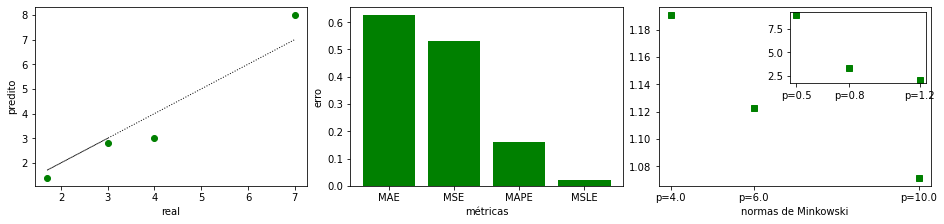

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics.pairwise import pairwise_distances as pNorm

from numpy import array
from matplotlib.pyplot import subplots
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

# conjunto de dados
x = array([3.0, 1.7, 4.0, 7.0]) # valores reais
xhat = array([2.8, 1.4, 3.0, 8.0]) # valores preditos

# erros
mae = MAE(x,xhat)
mse = MSE(x,xhat)
mape = MAPE(x,xhat)
msle = MSLE(x,xhat)

# normas de Minkowski
norms = []
P = [0.5, 0.8, 1.2, 4.0, 6.0, 10.0] # valores p

# calcula por matrizes de distâncias, mas armazena valor único
for p in P:
    norms.append(pNorm([x],[xhat],metric='minkowski',p=p).ravel()[0])


# gráficos
fig, ax = subplots(1,3,figsize=(13,3),constrained_layout=True)
ax[0].plot(x,x,'k:',lw=1.0)
ax[0].plot(x,xhat,'og')
ax[0].set_xlabel('real'); ax[0].set_ylabel('predito')

ax[1].bar(x=['MAE','MSE','MAPE','MSLE'],height=[mae,mse,mape,msle],color='g')
ax[1].set_xlabel('métricas'); ax[1].set_ylabel('erro')

ax[2].plot(P[3:],norms[3:],'sg')
ax[2].xaxis.set_major_locator(mticker.FixedLocator(P[3:]))
ax[2].set_xticklabels(list(map(lambda x: f'p={x:.1f}',P[3:])))

# eixo embutido
axi = inset_axes(ax[2],width="50%", height="40%", loc="upper right")
axi.plot(P[:3],norms[:3],'sg')
axi.xaxis.set_major_locator(mticker.FixedLocator(P[:3]))
axi.set_xticklabels(list(map(lambda x: f'p={x:.1f}',P[:3])))

ax[2].set_xlabel('normas de Minkowski'); ax[1].set_ylabel('erro');

Percebe-se que cada métrica retorna um valor diferente para o erro entre os valores exatos e os aproximados. Cabe ao usuário interpretar qual faz mais sentido para o conjunto de dados em análise.

## Aplicações

### Erros pontuais na função de Airy

A função de Airy é solução da [equação de Schrödinger](https://pt.wikipedia.org/wiki/Equação_de_Schrödinger) da mecânica quântica. Ela muda o seu comportamento de oscilatório para exponencial. A fim de demonstrar como o erro é uma função, dependente do ponto onde é avaliado, criaremos uma função "perturbada" que simulará o papel de função de Airy aproximada, enquanto manteremos a função de Airy verdadeira como exata. Em seguida, criaremos outra função de utilidade para calcular diretamente o erro relativo pontual.


In [ ]:
from scipy import special
import numpy as np

# Eixo das abscissas
x = np.linspace(-10, -2, 100)

# Funções de Airy e suas derivadas (solução exata)
A, aip, bi, bip = special.airy(x)

# Função de Airy perturbada
A_ = 1.152*A + 0.056*np.cos(x) 

Podemos usar o conceito de _função anônima_ (`lambda`) para calcular diretamente o erro relativo percentual para cada ponto $x$. Assim, seja:

$$ER_{\text{Airy}}(x) = \frac{\mid \ \hat{A}(x) - A(x) \ \mid}{\mid \ A(x) \ \mid},$$

onde $\hat{A}(x)$ é a função de Airy aproximada e $A(x)$ é a função de Airy exata. Então:

In [ ]:
# Define função anônima para erro relativo
ai = lambda f,f_: (abs(f_ - f)/abs(f))*100

# calcula erro relativo para função de Airy e sua aproximação
E_airy = ai(A,A_)

A seguir, mostramos a plotagem das funções exatas e aproximadas, bem como do erro relativo pontual.

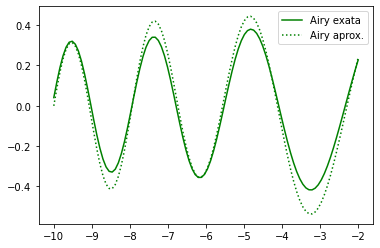

In [ ]:
# Plotagem das funções 
from matplotlib.pyplot import plot, grid, legend

plot(x, A, 'g-', label='Airy exata')
plot(x, A_, 'g:', label='Airy aprox.')
legend(loc='upper right');

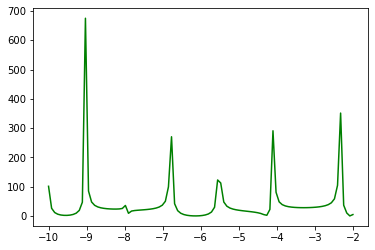

In [ ]:
# Plotagem do erro 
plot(x, E_airy,'g')

### Avaliação de algoritmos de ordenação

Vamos considerar um cenário em que estamos avaliando a eficiência de dois algoritmos de ordenação: o algoritmo de ordenação por inserção (_insertion sort_) e o algoritmo de ordenação rápida (_quick sort_). Suponha que temos um conjunto de dados com 10.000 elementos e queremos comparar o tempo de execução teórico e o medido para ambos os algoritmos.

Consideremos: 

- $x$: tempo de execução teórico do algoritmo.
- $\hat{x}$: tempo de execução medido do algoritmo.
- $ER = 1 - \dfrac{\hat{x}}{x}$

O _insertion sort_ possui complexidade teórica de $O(n^2)$. Consideremos que o tempo teórico para 10.000 elementos seja de 50 segundos. O _quick sort_ possui complexidade teórica de $O(n \, \log \, n)$. Consideremos que o tempo teórico para 10.000 elementos seja de 2 segundos.

Após executar os algoritmos em uma máquina específica, suponhamos que tenhamos obtido os seguintes tempos de execução:

- _insertion sort_: 55 segundos.
- _quick sort_: 2.5 segundos.

O cálculo do erro relativo mostra que:

- _insertion sort_: $ER = 1 - \frac{55}{50} = 1 - 1.1 = -0.1 = -10\%$
- _quick sort_: $ER = 1 - \frac{2.5}{2} = 1 - 1.25 = -0.25 = -25\%$.

Ou seja, para o _insertion sort_, o erro relativo de -10% indica que o algoritmo demorou 10% mais do que o esperado, o que pode ser atribuído a fatores como sobrecarga de processamento ou otimizações que não foram realizadas. Para o _quick sort_, o erro relativo de -25% indica que o algoritmo demorou 25% mais do que o esperado, sugerindo que o algoritmo pode não ter se comportado da melhor maneira para este conjunto de dados específico, ou que a implementação usada não foi a mais eficiente.

Esses cálculos de erro relativo são essenciais para avaliar o desempenho dos algoritmos em ambientes reais, comparando-os com as expectativas teóricas. Eles ajudam a identificar discrepâncias que podem surgir devido a vários fatores, como características do hardware, implementações específicas do algoritmo, e peculiaridades dos dados de entrada.

### Erros de precificação imobiliária por redes neurais

Vamos considerar um cenário onde estamos treinando uma rede neural para prever preços de imóveis com base em características como área, número de quartos, localização, etc. Para avaliar o desempenho da rede neural, usaremos o MSE e o MAE.

1. **Dados do Conjunto de Treinamento e Teste**

   - Temos um conjunto de dados com 1.000 amostras de preços de imóveis.

2. **Treinamento da Rede Neural**

   - A rede neural é treinada com um conjunto de treinamento e avaliada com um conjunto de teste.

3. **Resultados do Conjunto de Teste**

   - Valores reais dos preços dos imóveis: $\mathbf{x} = [200 \ \ 300 \ \ 250 \ \ 500 \ \ 400]^T$
   
   - Valores previstos pela rede neural $\mathbf{\hat{x}} = [210 \ \ 290 \ \ 240 \ \ 520 \ \ 410]^T$

4. **Cálculo do MSE**

$\text{MSE} = \frac{1}{5} \left[ (200 - 210)^2 + (300 - 290)^2 + (250 - 240)^2 + (500 - 520)^2 + (400 - 410)^2 \right]$

$\text{MSE} = \frac{1}{5} \left[ 100 + 100 + 100 + 400 + 100 \right] = \frac{1}{5} \times 800 = 160$

5. **Cálculo do MAE**

$\text{MAE} = \frac{1}{5} \left[ |200 - 210| + |300 - 290| + |250 - 240| + |500 - 520| + |400 - 410| \right]$

$\text{MAE} = \frac{1}{5} \left[ 10 + 10 + 10 + 20 + 10 \right] = \frac{1}{5} \times 60 = 12$

6. **Interpretação dos Resultados**

   - **MSE**: Um valor de 160 indica que, em média, os quadrados dos erros são relativamente altos. Como o MSE penaliza mais fortemente os grandes erros, este valor sugere que há algumas previsões com grandes discrepâncias.

   - **MAE**: Um valor de 12 indica que, em média, os erros absolutos entre as previsões e os valores reais são de 12 unidades monetárias. O MAE sendo menor que o MSE sugere que a maioria dos erros são pequenos, mas existem alguns grandes erros que estão influenciando o MSE.

   - **Ajuste do Modelo**: Se o MSE for muito maior que o MAE, isto pode indicar a presença de outliers que estão afetando negativamente o desempenho do modelo. Nesse caso, pode ser útil investigar os outliers e ajustar o modelo ou os dados de treinamento.

7. **Avaliação de Desempenho**

Ambas as métricas são úteis para avaliar a precisão do modelo, mas cada uma tem suas vantagens. O MSE é mais sensível a grandes erros, enquanto o MAE é mais intuitivo e menos sensível a outliers. O uso de MSE e MAE permite uma avaliação completa do desempenho de uma rede neural. Enquanto o MSE fornece uma visão detalhada dos erros grandes, o MAE oferece uma métrica mais robusta contra outliers, facilitando a interpretação dos resultados e a melhoria do modelo.

## Referências

```{bibliography}
:filter: docname in docnames
```

In [ ]:
plt.rcdefaults()